In [63]:
# forked from https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [64]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from _utils.u_constant import PATH_ROOT
path = PATH_ROOT + "Code projects/Python/kaggle/Titanic Machine Learning from Disaster/"

In [65]:
train_df = pd.read_csv(path + "train.csv")
test_df = pd.read_csv(path + "test.csv")
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. EDA

In [66]:
train_df.info(null_counts=True)
print("-------------------")
test_df.info(null_counts=True)
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare         

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strandberg, Miss. Ida Sofia",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [68]:
for feature in ["Pclass", "Sex", "SibSp", "Parch"]:
    grouped = train_df[[feature, "Survived"]]\
        .groupby(feature, as_index=False)\
        .mean()\
        .sort_values(by="Survived", ascending=False)
    print(grouped)
    print("-" * 30)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------------------
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------------
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
------------------------------


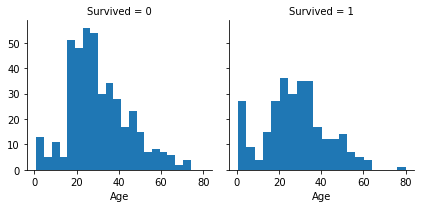

In [69]:
grid = sns.FacetGrid(data=train_df, col="Survived")
grid.map(plt.hist, "Age", bins=20)

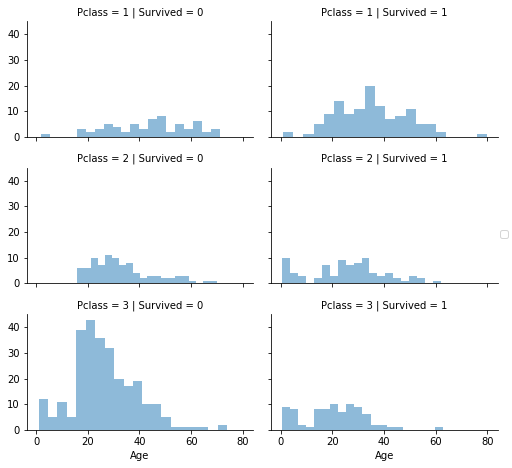

In [70]:
grid = sns.FacetGrid(data=train_df, col="Survived", row="Pclass", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


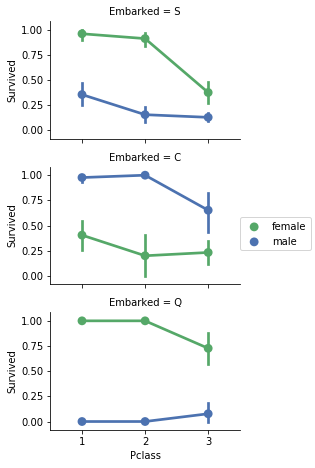

In [71]:
grid = sns.FacetGrid(train_df, row="Embarked", size=2.2, aspect=1.6)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette="deep")
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


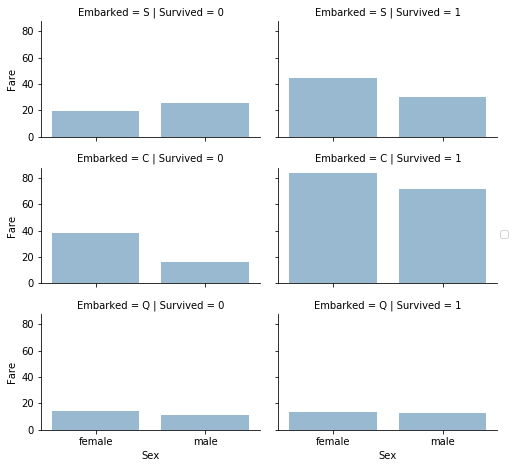

In [72]:
grid = sns.FacetGrid(data=train_df, row="Embarked", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Sex", "Fare", alpha=0.5, ci=None)
grid.add_legend()

In [73]:
train_df = train_df.drop(["Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)
combine = [train_df, test_df]

## 2. Feature Engineering

### 2.1 Name Title Extraction

In [74]:
for data in combine:
    data["Title"] = data["Name"].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [75]:
def treat_title(s):
    if s in ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']:
        return "Rare"
    if s in ["Mlle", "Ms"]:
        return "Miss"
    if s in ["Mme"]:
        return "Mrs"
    return s

for data in combine:
    data["Title"] = data["Title"].apply(treat_title)

In [76]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [77]:
'''change categorical to ordinal'''
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combine:
    data["Title"] = data["Title"].map(title_mapping)

In [78]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [79]:
train_df = train_df.drop(["Name", "PassengerId"], axis=1)
test_df = test_df.drop(["Name"], axis=1)
combine = [train_df, test_df]

### 2.2 Sex to numerical

In [80]:
for data in combine:
    data["Sex"] = data["Sex"].map({"male": 0, "female": 1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 2.3 Age Fill Null

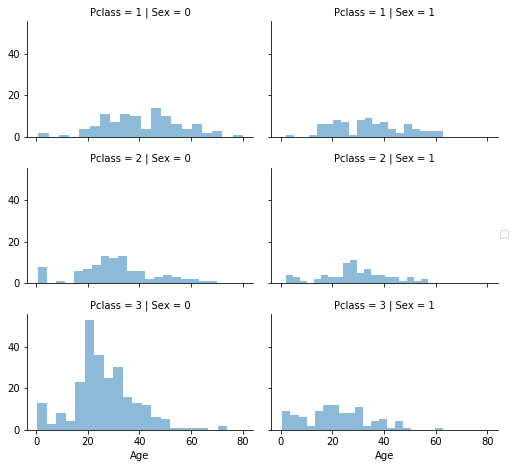

In [81]:
grid = sns.FacetGrid(data=train_df, row="Pclass", col="Sex", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

In [82]:
'''利用同性别同等仓位的中位数进行补充'''
age_summary = train_df[["Sex", "Pclass", "Age"]]\
    .groupby(["Sex", "Pclass"])\
    .agg({"Age": lambda s: int(np.nanmedian(s))})["Age"]\
    .to_dict()
print(age_summary)

for data in combine:
    data["Age"] = \
        data.apply(lambda row: age_summary[(row["Sex"], row["Pclass"])] if np.isnan(row["Age"]) else row["Age"], axis=1)

{(0, 1): 40.0, (0, 2): 30.0, (0, 3): 25.0, (1, 1): 35.0, (1, 2): 28.0, (1, 3): 21.0}


### 2.4 Age discretization

In [83]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']]\
    .groupby(['AgeBand'], as_index=False)\
    .mean()\
    .sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [84]:
def discretize_age(age):
    if age <= 16:
        return 0
    if age <= 32:
        return 1
    if age <= 48:
        return 2
    if age <= 64:
        return 3
    return 4

for data in combine:
    data["Age"] = data["Age"].apply(discretize_age)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.252, 48.168]"


In [85]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

### 2.5 Creating New Features 

In [86]:
'''creating FamilySize Feature'''
for data in combine:
    data["FamilySize"] = data["SibSp"] + data["Parch"] + 1

train_df[["FamilySize", "Survived"]]\
    .groupby("FamilySize", as_index=False)\
    .mean()\
    .sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [87]:
'''creating IsAlone Feature'''
for data in combine:
    data["IsAlone"] = (data["FamilySize"] == 1).astype(int)    
    
train_df[["IsAlone", "Survived"]]\
    .groupby("IsAlone", as_index=False)\
    .mean()\
    .sort_values(by="Survived", ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [88]:
train_df = train_df.drop(["SibSp", "Parch", "FamilySize"], axis=1)
test_df = test_df.drop(["SibSp", "Parch", "FamilySize"], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [89]:
for data in combine:
    data["Age*Pclass"] = data["Age"] * data["Pclass"]

### 2.6 Fill Embarked

In [90]:
mode_port = train_df["Embarked"].dropna().mode()[0]
mode_port

'S'

In [91]:
for data in combine:
    data["Embarked"] = data["Embarked"].fillna(mode_port)
    
train_df[["Embarked", "Survived"]]\
    .groupby("Embarked", as_index=False)\
    .mean()\
    .sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [92]:
'''convert to numerical'''
for data in combine:
    data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### 2.7 treat Fare

In [93]:
'''Fill test_df's Fare'''
test_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [94]:
'''create band'''
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']]\
    .groupby(['FareBand'], as_index=False)\
    .mean()\
    .sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [95]:
def discretize_fare(fare):
    if fare <= 7.91:
        return 0
    if fare <= 14.454:
        return 1
    if fare <= 31.0:
        return 2
    return 3

for data in combine:
    data["Fare"] = data["Fare"].apply(discretize_fare)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass,FareBand
0,0,3,0,1,0,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,3,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,1,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,3,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,1,0,1,1,6,"(7.91, 14.454]"


In [96]:
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

## 3. Model, Predict and Solve

In [97]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [98]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

acc_log = {}

### 3.1 LR

In [99]:
lr = LogisticRegression(solver="lbfgs", random_state=0)
lr.fit(X_train, y_train)
coefs = pd.DataFrame(list(zip(X_train.columns.tolist(), lr.coef_.flatten())), columns=["Features", "Coef"])\
    .sort_values(by="Coef", ascending=False)

y_pred = lr.predict(X_test)
acc = lr.score(X_train, y_train)
print(acc)
print("-" * 30)
print(coefs)
acc_log["LR"] = acc

0.813692480359147
------------------------------
     Features      Coef
1         Sex  2.202241
5       Title  0.405422
4    Embarked  0.276919
6     IsAlone  0.184158
7  Age*Pclass -0.049081
3        Fare -0.072521
2         Age -0.470744
0      Pclass -1.202458


### 3.2 SVM

In [100]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = svc.score(X_train, y_train)
print(acc)
acc_log["SVM"] = acc

0.835016835016835


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 3.3 KNN

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = knn.score(X_train, y_train)
print(acc)
acc_log["KNN"] = acc

0.8372615039281706


### 3.4 Naive Bayes

In [102]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = nb.score(X_train, y_train)
print(acc)
acc_log["Naive Bayes"] = acc

0.7687991021324355


### 3.5 Perceptron

In [103]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc = perceptron.score(X_train, y_train)
print(acc)
acc_log["Perceptron"] = acc

0.7665544332210998


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### 3.6 Linear SVC

In [104]:
linear_svc = LinearSVC(random_state=0)
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc = linear_svc.score(X_train, y_train)
print(acc)
acc_log["Linear SVC"] = acc

0.7946127946127947


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 3.7 SGD

In [105]:
sgd = SGDClassifier(random_state=0)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc = sgd.score(X_train, y_train)
print(acc)
acc_log["SGD"] = acc

0.7216610549943884


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### 3.8 Decision Tree

In [106]:
tree = DecisionTreeClassifier(random_state=0, max_depth=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = tree.score(X_train, y_train)
print(acc)
acc_log["Decision Tree"] = acc

0.8338945005611672


### 3.9 RandomForest

In [107]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc = random_forest.score(X_train, y_train)
print(acc)
acc_log["Random Forest"] = acc

0.8664421997755332


In [120]:
models = pd.DataFrame({"Model": list(acc_log.keys()), "Score": list(acc_log.values())})\
    .sort_values(by="Score", ascending=False)
print(models)

           Model     Score
8  Random Forest  0.866442
2            KNN  0.837262
1            SVM  0.835017
7  Decision Tree  0.833895
0             LR  0.813692
5     Linear SVC  0.794613
3    Naive Bayes  0.768799
4     Perceptron  0.766554
6            SGD  0.721661
